给定 n 个非负整数 a1，a2，...，an，每个数代表坐标中的一个点 (i, ai) 。在坐标内画 n 条垂直线，垂直线 i 的两个端点分别为 (i, ai) 和 (i, 0)。找出其中的两条线，使得它们与 x 轴共同构成的容器可以容纳最多的水。

说明：你不能倾斜容器，且 n 的值至少为 2。

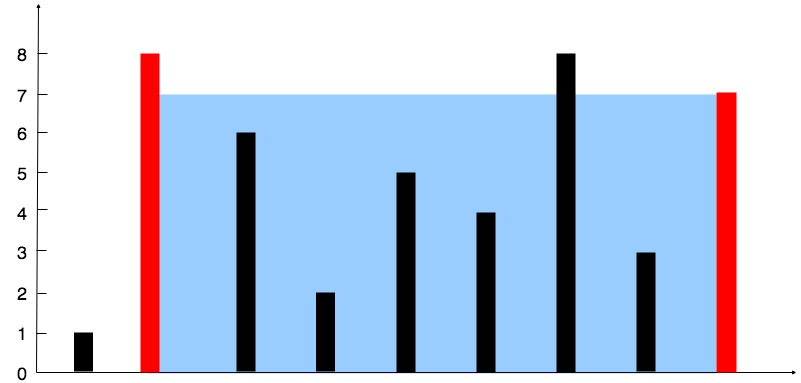

图中垂直线代表输入数组 [1,8,6,2,5,4,8,3,7]。在此情况下，容器能够容纳水（表示为蓝色部分）的最大值为 49。

The O(n) solution with proof by contradiction doesn't look intuitive enough to me. Before moving on, read the algorithm first if you don't know it yet.

Here's another way to see what happens in a matrix representation:

Draw a matrix where the row is the first line, and the column is the second line. For example, say n=6.

In the figures below, x means we don't need to compute the volume for that case: (1) On the diagonal, the two lines are overlapped; (2) The lower left triangle area of the matrix is symmetric to the upper right area.

We start by computing the volume at (1,6), denoted by o. Now if the left line is shorter than the right line, then all the elements left to (1,6) on the first row have smaller volume, so we don't need to compute those cases (crossed by ---).

  1 2 3 4 5 6
1 x ------- o
2 x x
3 x x x 
4 x x x x
5 x x x x x
6 x x x x x x
Next we move the left line and compute (2,6). Now if the right line is shorter, all cases below (2,6) are eliminated.

  1 2 3 4 5 6
1 x ------- o
2 x x       o
3 x x x     |
4 x x x x   |
5 x x x x x |
6 x x x x x x
And no matter how this o path goes, we end up only need to find the max value on this path, which contains n-1 cases.

  1 2 3 4 5 6
1 x ------- o
2 x x - o o o
3 x x x o | |
4 x x x x | |
5 x x x x x |
6 x x x x x x
Hope this helps. I feel more comfortable seeing things this way.


In [3]:
def maxArea(height):
        """
        :type height: List[int]
        :rtype: int
        """
        Max, left, right = 0, 0, len(height) - 1
        while left < right:
            Max = max(Max,min(height[left], height[right]) * (right - left))
            if height[left] < height[right]:
                left += 1
            else:
                right -= 1
        return Max
        

In [13]:
maxArea( [1,9,6,2,77,4,71,3,8])

142